In [28]:
pip install vtki

Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement vtki (from versions: none)
ERROR: No matching distribution found for vtki
Note: you may need to restart the kernel to use updated packages.


In [1]:
#Import all the necessary libraries
import vtk
import numpy as np
from vtk.util.numpy_support import vtk_to_numpy
import math
import pyevtk
from matplotlib import pyplot as plt
from scipy.interpolate import RegularGridInterpolator
from mpl_toolkits.mplot3d import Axes3D  # Required for 3D plotting
import pyvista as pv
from scipy.spatial import Delaunay
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
#from enthought.tvtk.api import tvtk, write_data
from scipy.interpolate import griddata
from pyevtk.hl import gridToVTK
import random

In [2]:
#Load the dataset
reader = vtk.vtkXMLImageDataReader()
reader.SetFileName("Isabel_Pressure_25.vti")
reader.Update()
imageData = reader.GetOutput() #read data

In [19]:
#Convert the data into numpy array format
temp = vtk_to_numpy(imageData.GetPointData().GetScalars())
dims = imageData.GetDimensions()
dat = temp.reshape(dims[2], dims[1], dims[0])
dat = dat.transpose(2,1,0)

dat.shape
 #dimensions of the data
#dat[249][249][49]

(250, 250, 50)

In [20]:
original_data.shape

(250, 250, 50)

In [25]:
  # Replace with your actual data

# Define the percentage of data you have (e.g., 5%)
    
original_data=dat
data_percentage =  5/100

# Calculate the number of known data points
num_known_points = int(np.prod(original_data.shape) * data_percentage)
#print(num_known_points)
# Randomly select known data points
known_coordinates = np.column_stack([np.random.randint(0, 250, num_known_points),
                                     np.random.randint(0, 250, num_known_points),
                                     np.random.randint(0, 50, num_known_points)])
# Extract the values at the known coordinates
known_values = original_data[known_coordinates[:, 0], known_coordinates[:, 1], known_coordinates[:, 2]]
#print(known_values.shape())
# Create a grid of coordinates for the entire 3D space
x = np.arange(original_data.shape[0])
y = np.arange(original_data.shape[1])
z = np.arange(original_data.shape[2])
interpolator = RegularGridInterpolator((x, y, z), original_data, method='linear', bounds_error=False, fill_value=None)

# Define the grid of coordinates for the entire 3D space
grid_x, grid_y, grid_z = np.meshgrid(x, y, z, indexing='ij')
# Create an array of coordinates for the entire grid
grid_coordinates = np.column_stack([grid_x.ravel(), grid_y.ravel(), grid_z.ravel()])
reconstructed_data = griddata(known_coordinates, known_values, (grid_x, grid_y, grid_z), method='nearest')

#point_cloud = np.column_stack([grid_x.ravel(), grid_y.ravel(), grid_z.ravel()])

# # Perform 3D Delaunay triangulation to create a mesh
#tri = Delaunay(point_cloud)

# # Extract the triangles from the Delaunay triangulation
#triangles = point_cloud[tri.simplices]

# # Plot the reconstructed 3D surface
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# # Create a Poly3DCollection from the triangles
#mesh = Poly3DCollection(triangles, edgecolor='k')
print("saving started")

gridToVTK("100%_reconstructed", x=np.array(range(reconstructed_data.shape[0])), y=np.array(range(reconstructed_data.shape[1])), z=np.array(range(reconstructed_data.shape[2])), cellData={'data': reconstructed_data})

# #ax.add_collection3d(mesh)
# ax.set_xlabel('X-axis')
# ax.set_ylabel('Y-axis')
# ax.set_zlabel('Z-axis')


#plt.show()
# Interpolate the missing data points
#reconstructed_data = interpolator(grid_coordinates).reshape(original_data.shape)

# You can visualize the reconstructed data using a library like Matplotlib or a 3D visualization library.
# # Create a 3D figure
# fig = plt.figure(figsize=(12, 6))
# # Subplot for original data
# ax1 = fig.add_subplot(121, projection='3d')
# x, y, z = np.meshgrid(np.arange(original_data.shape[0]), np.arange(original_data.shape[1]), np.arange(original_data.shape[2]), indexing='ij')
# ax1.scatter(x, y, z, c=original_data, cmap='spring', marker='o',alpha=0.01)
# ax1.set_xlabel('X-axis')
# ax1.set_ylabel('Y-axis')
# ax1.set_zlabel('Z-axis')
# ax1.set_title('Original 3D Data')
# # Subplot for reconstructed data
# ax2 = fig.add_subplot(122, projection='3d')
# ax2.scatter(x,y,z, c=reconstructed_data, cmap='spring', marker='o',alpha=0.01)
# ax2.set_xlabel('X-axis')
# ax2.set_ylabel('Y-axis')
# ax2.set_zlabel('Z-axis')
# ax2.set_title('Reconstructed 3D Data')

# # Display the plot
# plt.show()

saving started


'/home/aashi/Desktop/CS677_project/100%_reconstructed.vtr'

In [48]:
snr = []*10
k=1
for i in range(1,100,10):
    data_percentage =  i/100

    # Calculate the number of known data points
    num_known_points = int(np.prod(original_data.shape) * data_percentage)
    #print(num_known_points)
    # Randomly select known data points
    known_coordinates = np.column_stack([np.random.randint(0, 250, num_known_points),
                                         np.random.randint(0, 250, num_known_points),
                                         np.random.randint(0, 50, num_known_points)])
    # Extract the values at the known coordinates
    known_values = original_data[known_coordinates[:, 0], known_coordinates[:, 1], known_coordinates[:, 2]]
    #print(known_values.shape())
    # Create a grid of coordinates for the entire 3D space
    x = np.arange(original_data.shape[0])
    y = np.arange(original_data.shape[1])
    z = np.arange(original_data.shape[2])
    interpolator = RegularGridInterpolator((x, y, z), original_data, method='linear', bounds_error=False, fill_value=None)

    # Define the grid of coordinates for the entire 3D space
    grid_x, grid_y, grid_z = np.meshgrid(x, y, z, indexing='ij')
    # Create an array of coordinates for the entire grid
    grid_coordinates = np.column_stack([grid_x.ravel(), grid_y.ravel(), grid_z.ravel()])
    reconstructed_data = griddata(known_coordinates, known_values, (grid_x, grid_y, grid_z), method='nearest')
    signal_power = np.std(original_data)  # For mean power, you can also use np.max(original_data) for peak power

    # Calculate the mean or peak noise power
    noise = original_data - reconstructed_data
    noise_power = np.std(noise)  # For mean power, you can also use np.max(noise ** 2) for peak power

    # Calculate SNR
    snr.append(20*np.log10(signal_power/noise_power))
    print(snr)
    k= k+1





[11.282787883586966]
[11.282787883586966, 14.333217501652054]
[11.282787883586966, 14.333217501652054, 15.545501488592436]
[11.282787883586966, 14.333217501652054, 15.545501488592436, 16.343505264663683]
[11.282787883586966, 14.333217501652054, 15.545501488592436, 16.343505264663683, 17.05086673899431]
[11.282787883586966, 14.333217501652054, 15.545501488592436, 16.343505264663683, 17.05086673899431, 17.606329383545454]
[11.282787883586966, 14.333217501652054, 15.545501488592436, 16.343505264663683, 17.05086673899431, 17.606329383545454, 18.02827638488256]
[11.282787883586966, 14.333217501652054, 15.545501488592436, 16.343505264663683, 17.05086673899431, 17.606329383545454, 18.02827638488256, 18.453423812333803]
[11.282787883586966, 14.333217501652054, 15.545501488592436, 16.343505264663683, 17.05086673899431, 17.606329383545454, 18.02827638488256, 18.453423812333803, 18.636962722913143]
[11.282787883586966, 14.333217501652054, 15.545501488592436, 16.343505264663683, 17.05086673899431,

In [56]:
len(range(0,101,10))

11

Text(0, 0.5, 'SNR values')

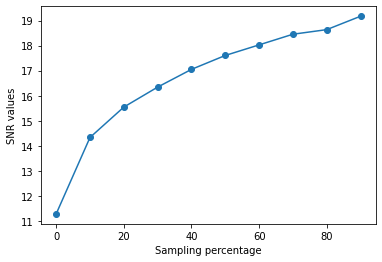

In [62]:
plt.plot(range(0,100,10),snr,"-o")
plt.xlabel("Sampling percentage")
plt.ylabel("SNR values")

In [37]:
signal_power = np.mean(original_data)  # For mean power, you can also use np.max(original_data) for peak power

# Calculate the mean or peak noise power
noise = original_data - reconstructed_data
noise_power = np.mean(noise ** 2)  # For mean power, you can also use np.max(noise ** 2) for peak power

# Calculate SNR
snr = 10 * np.log10(signal_power/noise_power)

print(f"Signal-to-Noise Ratio (SNR): {snr} dB")

Signal-to-Noise Ratio (SNR): -21.62087789357219 dB


In [ ]:
isosurface = grid.extract_iso_surfaces(0.5)

# Plot the isosurface
plotter = pv.Plotter()
plotter.add_mesh(isosurface, color='blue', opacity=0.6)
plotter.show()

In [ ]:
grid = pv.StructuredGrid()
grid.points = pv.pyvista_ndarray(np.column_stack([x.ravel(), y.ravel(), z.ravel()]))
grid['Reconstructed Data'] = reconstructed_data.ravel()

# Plot the volume rendering
plotter = pv.Plotter()
plotter.add_volume(grid)
plotter.show()